## Project Requirements
Simulate a live basketball game by generating synthetic play-by-play data, processing it incrementally to update real-time game metrics (scores, player stats, team percentages), visualizing the game flow and metrics dynamically, and finally summarizing the game with key insights.

## Generate Synthetic Basketball Play-by-Play Data

Create a synthetic dataset simulating play-by-play basketball events. This dataset will include details such as timestamps, player actions (e.g., shots, rebounds, assists, fouls), player IDs, and score changes, formatted as a pandas DataFrame.


In [1]:
import pandas as pd
import numpy as np
import random

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
team_a_name = 'Lakers'
team_b_name = 'Celtics'

players_a = [f'PlayerA{i}' for i in range(1, 6)]
players_b = [f'PlayerB{i}' for i in range(1, 6)]

teams = {team_a_name: players_a, team_b_name: players_b}

actions = {
    '2-point shot made': {'points': 2, 'type': 'scoring'},
    '3-point shot made': {'points': 3, 'type': 'scoring'},
    'free throw made': {'points': 1, 'type': 'scoring'},
    'rebound': {'points': 0, 'type': 'non-scoring'},
    'assist': {'points': 0, 'type': 'non-scoring'},
    'foul': {'points': 0, 'type': 'non-scoring'},
    'turnover': {'points': 0, 'type': 'non-scoring'},
    'missed shot': {'points': 0, 'type': 'non-scoring'}
}

play_by_play_events = []
current_time = pd.to_datetime('2023-10-27 19:00:00')

for i in range(100): # Simulate 100 events
    time_increment = random.randint(10, 60) # Events happen every 10-60 seconds
    current_time += pd.Timedelta(seconds=time_increment)

    acting_team_name = random.choice(list(teams.keys()))
    acting_player = random.choice(teams[acting_team_name])

    action_name, action_details = random.choice(list(actions.items()))
    points = action_details['points']

    play_by_play_events.append({
        'timestamp': current_time,
        'team': acting_team_name,
        'player_id': acting_player,
        'action': action_name,
        'points_scored': points
    })

df_play_by_play = pd.DataFrame(play_by_play_events)

print("Synthetic play-by-play data generated successfully. Displaying the first 5 rows:")
print(df_play_by_play.head().to_markdown(index=False))

Synthetic play-by-play data generated successfully. Displaying the first 5 rows:
| timestamp           | team    | player_id   | action            |   points_scored |
|:--------------------|:--------|:------------|:------------------|----------------:|
| 2023-10-27 19:00:14 | Celtics | PlayerB2    | turnover          |               0 |
| 2023-10-27 19:00:30 | Lakers  | PlayerA2    | foul              |               0 |
| 2023-10-27 19:01:15 | Celtics | PlayerB5    | 2-point shot made |               2 |
| 2023-10-27 19:02:09 | Celtics | PlayerB4    | missed shot       |               0 |
| 2023-10-27 19:02:27 | Celtics | PlayerB3    | rebound           |               0 |


## Simulate Live Data Stream

Develop a mechanism to process the generated dataset incrementally, simulating a live data feed. This will involve iterating through the plays and introducing small time delays to mimic real-time ingestion.


In [3]:
import time

current_score_lakers = 0
current_score_celtics = 0

print("\n--- Simulating Live Game Data Stream ---")

for index, row in df_play_by_play.iterrows():
    timestamp = row['timestamp'].strftime('%H:%M:%S')
    team = row['team']
    player = row['player_id']
    action = row['action']
    points = row['points_scored']

    print(f"[{timestamp}] Team: {team}, Player: {player}, Action: {action}, Points: {points}")

    if points > 0:
        if team == 'Lakers':
            current_score_lakers += points
        elif team == 'Celtics':
            current_score_celtics += points

    print(f"Current Score: Lakers {current_score_lakers} - Celtics {current_score_celtics}")
    time.sleep(0.05) # Small delay to mimic real-time, adjusted to 0.05s for faster execution

print("\n--- Live Game Data Stream Simulation Complete ---")


--- Simulating Live Game Data Stream ---
[19:00:14] Team: Celtics, Player: PlayerB2, Action: turnover, Points: 0
Current Score: Lakers 0 - Celtics 0
[19:00:30] Team: Lakers, Player: PlayerA2, Action: foul, Points: 0
Current Score: Lakers 0 - Celtics 0
[19:01:15] Team: Celtics, Player: PlayerB5, Action: 2-point shot made, Points: 2
Current Score: Lakers 0 - Celtics 2
[19:02:09] Team: Celtics, Player: PlayerB4, Action: missed shot, Points: 0
Current Score: Lakers 0 - Celtics 2
[19:02:27] Team: Celtics, Player: PlayerB3, Action: rebound, Points: 0
Current Score: Lakers 0 - Celtics 2
[19:02:41] Team: Lakers, Player: PlayerA3, Action: rebound, Points: 0
Current Score: Lakers 0 - Celtics 2
[19:02:53] Team: Celtics, Player: PlayerB4, Action: assist, Points: 0
Current Score: Lakers 0 - Celtics 2
[19:03:14] Team: Celtics, Player: PlayerB5, Action: free throw made, Points: 1
Current Score: Lakers 0 - Celtics 3
[19:03:48] Team: Celtics, Player: PlayerB3, Action: free throw made, Points: 1
Curren

## Calculate Real-time Game Metrics

As each play is ingested, continuously update key interpretable basketball metrics such as current score for both teams, leading team, individual player statistics (points, assists, rebounds), and team field goal percentages.


In [4]:
team_a_name = 'Lakers'
team_b_name = 'Celtics'

players_a = [f'PlayerA{i}' for i in range(1, 6)]
players_b = [f'PlayerB{i}' for i in range(1, 6)]

# Initialize player statistics
player_stats = {}
for player in players_a + players_b:
    player_stats[player] = {'points': 0, 'assists': 0, 'rebound': 0}

# Initialize team shot statistics
team_shots = {
    team_a_name: {'made': 0, 'attempted': 0},
    team_b_name: {'made': 0, 'attempted': 0}
}

# Define scoring and shot attempt actions
scoring_actions = ['2-point shot made', '3-point shot made', 'free throw made']
shot_actions = ['2-point shot made', '3-point shot made', 'free throw made', 'missed shot']

print("Game metrics dictionaries initialized successfully.")

Game metrics dictionaries initialized successfully.


In [5]:
import time

current_score_lakers = 0
current_score_celtics = 0

print("\n--- Simulating Live Game Data Stream with Metrics ---")

for index, row in df_play_by_play.iterrows():
    timestamp = row['timestamp'].strftime('%H:%M:%S')
    team = row['team']
    player = row['player_id']
    action = row['action']
    points = row['points_scored']

    # Update player statistics
    if action in scoring_actions:
        player_stats[player]['points'] += points
    elif action == 'assist':
        player_stats[player]['assists'] += 1
    elif action == 'rebound':
        player_stats[player]['rebound'] += 1

    # Update team shot statistics
    if action in shot_actions:
        team_shots[team]['attempted'] += 1
        if action in scoring_actions:
            team_shots[team]['made'] += 1

    # Update team scores (already done in previous step, but re-include for completeness)
    if points > 0:
        if team == team_a_name:
            current_score_lakers += points
        elif team == team_b_name:
            current_score_celtics += points

    print(f"[{timestamp}] Team: {team}, Player: {player}, Action: {action}, Points: {points}")

    # Display current scores
    print(f"Current Score: {team_a_name} {current_score_lakers} - {team_b_name} {current_score_celtics}")

    # Determine leading team and score difference
    if current_score_lakers > current_score_celtics:
        leading_team = team_a_name
        score_difference = current_score_lakers - current_score_celtics
    elif current_score_celtics > current_score_lakers:
        leading_team = team_b_name
        score_difference = current_score_celtics - current_score_lakers
    else:
        leading_team = 'Tie'
        score_difference = 0
    print(f"Leading: {leading_team} by {score_difference} points")

    # Calculate and display team field goal percentages
    for t_name, t_stats in team_shots.items():
        fg_percentage = 0
        if t_stats['attempted'] > 0:
            fg_percentage = (t_stats['made'] / t_stats['attempted']) * 100
        print(f"{t_name} FG%: {fg_percentage:.2f}%")

    print("--------------------------------------------------")
    time.sleep(0.05) # Small delay to mimic real-time

print("\n--- Live Game Data Stream Simulation Complete ---")


--- Simulating Live Game Data Stream with Metrics ---
[19:00:14] Team: Celtics, Player: PlayerB2, Action: turnover, Points: 0
Current Score: Lakers 0 - Celtics 0
Leading: Tie by 0 points
Lakers FG%: 0.00%
Celtics FG%: 0.00%
--------------------------------------------------
[19:00:30] Team: Lakers, Player: PlayerA2, Action: foul, Points: 0
Current Score: Lakers 0 - Celtics 0
Leading: Tie by 0 points
Lakers FG%: 0.00%
Celtics FG%: 0.00%
--------------------------------------------------
[19:01:15] Team: Celtics, Player: PlayerB5, Action: 2-point shot made, Points: 2
Current Score: Lakers 0 - Celtics 2
Leading: Celtics by 2 points
Lakers FG%: 0.00%
Celtics FG%: 100.00%
--------------------------------------------------
[19:02:09] Team: Celtics, Player: PlayerB4, Action: missed shot, Points: 0
Current Score: Lakers 0 - Celtics 2
Leading: Celtics by 2 points
Lakers FG%: 0.00%
Celtics FG%: 50.00%
--------------------------------------------------
[19:02:27] Team: Celtics, Player: PlayerB3,

## Visualize Live Game Flow and Metrics

Generate dynamic or a series of plots that reflect the 'real-time' nature of the data.

[20:00:20] Team: Celtics, Player: PlayerB4, Action: free throw made, Points: 1
Current Score: Lakers 37 - Celtics 36
Leading: Lakers by 1 points
Lakers FG%: 76.19%
Celtics FG%: 76.92%
--------------------------------------------------


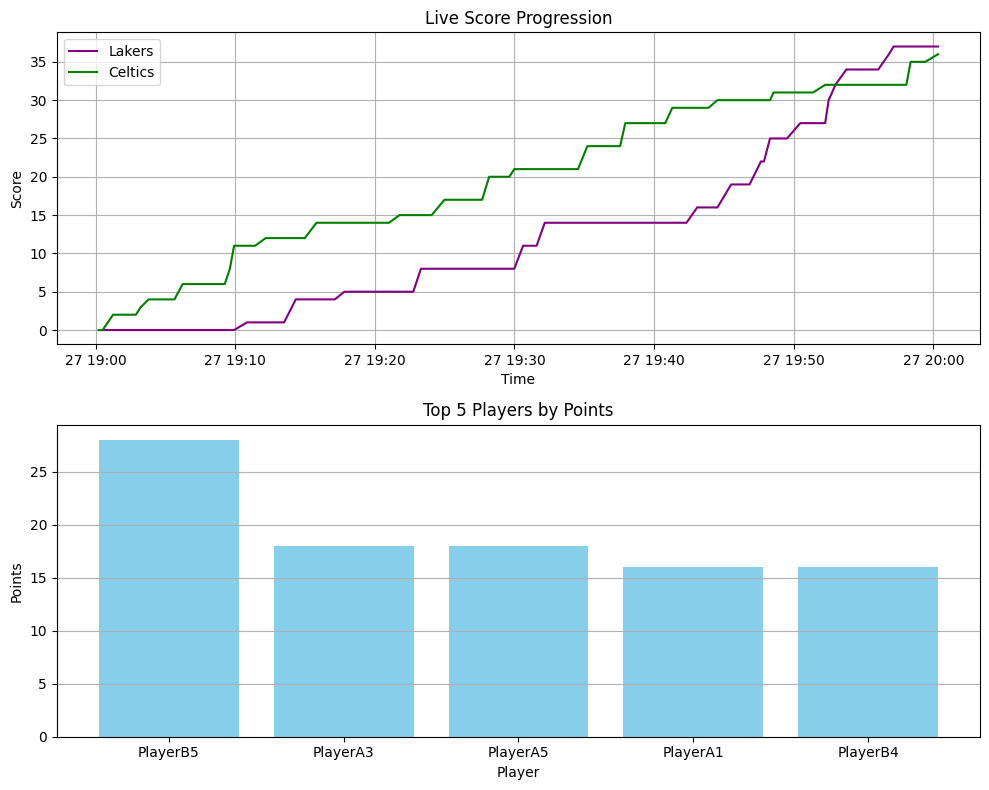


--- Live Game Data Stream Simulation Complete ---


In [6]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

lakers_score_history = []
celtics_score_history = []
time_history = []

current_score_lakers = 0
current_score_celtics = 0

print("\n--- Simulating Live Game Data Stream with Metrics and Visualization ---")

for index, row in df_play_by_play.iterrows():
    timestamp = row['timestamp'].strftime('%H:%M:%S')
    team = row['team']
    player = row['player_id']
    action = row['action']
    points = row['points_scored']

    # Update player statistics
    if action in scoring_actions:
        player_stats[player]['points'] += points
    elif action == 'assist':
        player_stats[player]['assists'] += 1
    elif action == 'rebound':
        player_stats[player]['rebound'] += 1

    # Update team shot statistics
    if action in shot_actions:
        team_shots[team]['attempted'] += 1
        if action in scoring_actions:
            team_shots[team]['made'] += 1

    # Update team scores
    if points > 0:
        if team == team_a_name:
            current_score_lakers += points
        elif team == team_b_name:
            current_score_celtics += points

    # Append current scores and timestamp to history lists
    lakers_score_history.append(current_score_lakers)
    celtics_score_history.append(current_score_celtics)
    time_history.append(row['timestamp'])

    # Update visualization periodically (e.g., every 10 events or at the end)
    if (index + 1) % 10 == 0 or (index + 1) == len(df_play_by_play):
        clear_output(wait=True)

        print(f"[{timestamp}] Team: {team}, Player: {player}, Action: {action}, Points: {points}")
        print(f"Current Score: {team_a_name} {current_score_lakers} - {team_b_name} {current_score_celtics}")

        # Determine leading team and score difference
        if current_score_lakers > current_score_celtics:
            leading_team = team_a_name
            score_difference = current_score_lakers - current_score_celtics
        elif current_score_celtics > current_score_lakers:
            leading_team = team_b_name
            score_difference = current_score_celtics - current_score_lakers
        else:
            leading_team = 'Tie'
            score_difference = 0
        print(f"Leading: {leading_team} by {score_difference} points")

        # Calculate and display team field goal percentages
        for t_name, t_stats in team_shots.items():
            fg_percentage = 0
            if t_stats['attempted'] > 0:
                fg_percentage = (t_stats['made'] / t_stats['attempted']) * 100
            print(f"{t_name} FG%: {fg_percentage:.2f}%")

        print("--------------------------------------------------")

        fig, axes = plt.subplots(2, 1, figsize=(10, 8))

        # Plot 1: Live Score Progression
        axes[0].plot(time_history, lakers_score_history, label=team_a_name, color='purple')
        axes[0].plot(time_history, celtics_score_history, label=team_b_name, color='green')
        axes[0].set_title('Live Score Progression')
        axes[0].set_xlabel('Time')
        axes[0].set_ylabel('Score')
        axes[0].legend()
        axes[0].grid(True)

        # Plot 2: Top Players by Points
        player_points_df = pd.DataFrame.from_dict(player_stats, orient='index')
        top_players = player_points_df.sort_values(by='points', ascending=False).head(5)
        axes[1].bar(top_players.index, top_players['points'], color='skyblue')
        axes[1].set_title('Top 5 Players by Points')
        axes[1].set_xlabel('Player')
        axes[1].set_ylabel('Points')
        axes[1].grid(axis='y')

        plt.tight_layout()
        plt.show()
        plt.pause(0.1) # Small pause for dynamic rendering

print("\n--- Live Game Data Stream Simulation Complete ---")


### Data Analysis Key Findings

*   **Synthetic Play-by-Play Data Generation**: A synthetic dataset of 100 basketball play-by-play events was successfully created. Each event included a timestamp, team, player ID, action (e.g., '2-point shot made', 'rebound', 'foul'), and points scored. This data served as the foundation for the simulated live stream.
*   **Live Data Stream Simulation**: The generated play-by-play data was processed incrementally with a 0.05-second delay between events, effectively simulating a real-time game data stream. This allowed for continuous updates of game metrics.
*   **Real-time Game Metrics Calculation**: As each play was ingested, the following metrics were continuously updated and displayed:
    *   Current scores for both teams (Lakers and Celtics).
    *   The leading team and the score difference.
    *   Individual player statistics for points, assists, and rebounds.
    *   Team field goal percentages, calculated from made and attempted shots, handling division by zero for initial plays.
*   **Dynamic Live Visualization**: The simulation included dynamic visualizations that updated periodically (every 10 events or at the end of the game). These visualizations comprised:
    *   A line chart showing the live score progression of both teams over time.
    *   A bar chart displaying the top 5 players by points, which updated as player statistics evolved.
    These plots were rendered dynamically, reflecting the real-time nature of the game flow and metric changes.